# Sharpe Ratios for Different Sectors in NSE

## Metal Sector 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers=['TATASTEEL.NS', 'HINDALCO.NS', 'JSWSTEEL.NS', 'ADANIENT.NS', 'VEDL.NS',
         'COALINDIA.NS', 'SAIL.NS', 'JINDALSTEL.NS', 'NMDC.NS', 'APLAPOLLO.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS  VEDL.NS  \
Date                                                                       
2017-01-02           NaN          NaN          NaN          NaN      NaN   
2017-01-03      -0.00848      0.00000      0.00627     -0.00520 -0.00588   
2017-01-04       0.00533      0.00031     -0.00854      0.01633 -0.01298   
2017-01-05       0.03416      0.01951      0.07728      0.01735  0.05005   
2017-01-06       0.00060     -0.00772     -0.00256     -0.00632  0.01296   
...                  ...          ...          ...          ...      ...   
2020-12-24       0.00145      0.00318     -0.00164      0.02168  0.08242   
2020-12-28       0.01663      0.01245      0.05556      0.03631  0.00368   
2020-12-29      -0.00071     -0.01792     -0.01242     -0.00336 -0.02050   
2020-12-30       0.01305      0.00764      0.01126     -0.01032  0.01218   
2020-12-31       0.00500      0.01327      0.00285     -0.00950 -0.00401   

            COALINDIA.NS  SAIL.NS  JINDALSTEL.NS  NMDC.NS  APLAPOLLO.NS  
Date                                                                     
2017-01-02           NaN      NaN            NaN      NaN           NaN  
2017-01-03       0.01750  0.02277        0.00071  0.01599       0.00593  
2017-01-04       0.00278 -0.02130        0.01136  0.03071       0.01551  
2017-01-05       0.00702  0.02770        0.06039  0.00521       0.00255  
2017-01-06      -0.00681  0.00096       -0.02583  0.00741       0.01189  
...                  ...      ...            ...      ...           ...  
2020-12-24       0.00889  0.02032       -0.01163  0.01523       0.01036  
2020-12-28       0.01028  0.06141        0.03047  0.02294       0.06281  
2020-12-29      -0.01853  0.00860       -0.02901 -0.01854       0.01341  
2020-12-30       0.00370  0.08140        0.02525  0.01845       0.01915  
2020-12-31      -0.00111  0.06237        0.00188 -0.01251       0.05704  

[988 rows x 10 columns]

In [2]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

TATASTEEL.NS     0.000880
HINDALCO.NS      0.000771
JSWSTEEL.NS      0.001247
ADANIENT.NS      0.003060
VEDL.NS          0.000437
COALINDIA.NS    -0.000316
SAIL.NS          0.000860
JINDALSTEL.NS    0.001997
NMDC.NS          0.000395
APLAPOLLO.NS     0.001923
dtype: float64
               TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  ADANIENT.NS   VEDL.NS  \
TATASTEEL.NS       0.000556     0.000412     0.000397     0.000274  0.000393   
HINDALCO.NS        0.000412     0.000656     0.000397     0.000300  0.000448   
JSWSTEEL.NS        0.000397     0.000397     0.000571     0.000308  0.000379   
ADANIENT.NS        0.000274     0.000300     0.000308     0.001157  0.000297   
VEDL.NS            0.000393     0.000448     0.000379     0.000297  0.000765   
COALINDIA.NS       0.000166     0.000176     0.000159     0.000173  0.000186   
SAIL.NS            0.000521     0.000484     0.000461     0.000407  0.000484   
JINDALSTEL.NS      0.000591     0.000578     0.000580     0.000468  0.000531   
NMDC.

In [3]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'TATASTEEL.NS',
 'HINDALCO.NS',
 'JSWSTEEL.NS',
 'ADANIENT.NS',
 'VEDL.NS',
 'COALINDIA.NS',
 'SAIL.NS',
 'JINDALSTEL.NS',
 'NMDC.NS',
 'APLAPOLLO.NS']

In [6]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe  TATASTEEL.NS  HINDALCO.NS  JSWSTEEL.NS  \
0     0.265859  0.278052  0.956148      0.160154     0.005476     0.212776   
1     0.312944  0.317209  0.986555      0.070267     0.118303     0.097577   
2     0.297387  0.309597  0.960563      0.132657     0.020629     0.208107   
3     0.260915  0.308859  0.844772      0.030685     0.193167     0.010220   
4     0.250670  0.316590  0.791781      0.136079     0.145451     0.055670   
...        ...       ...       ...           ...          ...          ...   
9995  0.284097  0.345607  0.822022      0.147610     0.094037     0.118904   
9996  0.263388  0.317156  0.830468      0.010384     0.102380     0.039085   
9997  0.347927  0.345937  1.005753      0.077189     0.159263     0.013182   
9998  0.318824  0.337055  0.945910      0.000534     0.141053     0.132481   
9999  0.345660  0.308194  1.121567      0.021433     0.110674     0.178851   

      ADANIENT.NS   VEDL.NS  COALINDIA.NS   SAIL.NS  JINDALSTEL.NS   NMDC.NS  \
0        0.090417  0.112701      0.153342  0.031173       0.004053  0.071912   
1        0.120201  0.043569      0.084728  0.088054       0.150305  0.134390   
2        0.141501  0.094619      0.165517  0.053759       0.117171  0.027017   
3        0.118755  0.100633      0.187498  0.049712       0.151756  0.098330   
4        0.042672  0.078357      0.086957  0.085192       0.135652  0.155753   
...           ...       ...           ...       ...            ...       ...   
9995     0.023798  0.031030      0.000171  0.112365       0.201405  0.215303   
9996     0.160532  0.121762      0.285654  0.077309       0.188957  0.010776   
9997     0.167070  0.130214      0.008463  0.072000       0.197786  0.121145   
9998     0.196457  0.160514      0.045851  0.191465       0.056034  0.057709   
9999     0.146512  0.045321      0.142259  0.017302       0.163774  0.036000   

      APLAPOLLO.NS  
0         0.157996  
1         0.092604  
2         0.039023  
3         0.059244  
4         0.078217  
...            ...  
9995      0.055376  
9996      0.003161  
9997      0.053687  
9998      0.017902  
9999      0.137877  

[10000 rows x 13 columns]

In [7]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean             0.418556
sd               0.301816
Sharpe           1.386790
TATASTEEL.NS     0.063447
HINDALCO.NS      0.013337
JSWSTEEL.NS      0.121612
ADANIENT.NS      0.230144
VEDL.NS          0.009577
COALINDIA.NS     0.032440
SAIL.NS          0.044030
JINDALSTEL.NS    0.040809
NMDC.NS          0.149992
APLAPOLLO.NS     0.294613
Name: 2482, dtype: float64


In [8]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.208247
sd               0.267287
Sharpe           0.779114
TATASTEEL.NS     0.139357
HINDALCO.NS      0.034770
JSWSTEEL.NS      0.163883
ADANIENT.NS      0.069264
VEDL.NS          0.140652
COALINDIA.NS     0.265860
SAIL.NS          0.002904
JINDALSTEL.NS    0.008319
NMDC.NS          0.047345
APLAPOLLO.NS     0.127648
Name: 8662, dtype: float64


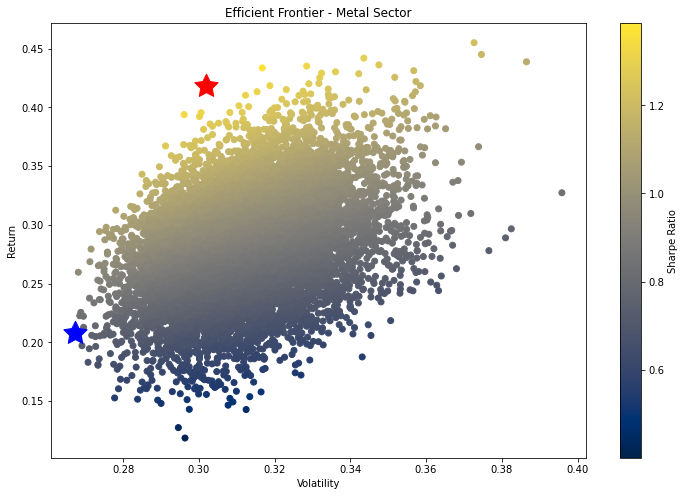

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - Metal Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()